<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/7.%20MNIST%20using%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PytorchでMNIST**

In [ ]:
# PytorchでMNIST
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader  # DataLoaderを直接インポート


# CUDAが利用可能かどうかを確認し、利用可能な場合はデバイスをCUDAに設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

# データの準備
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# データローダーの定義
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=1000, shuffle=False)


# モデルの定義
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデルの学習と評価
model = Net()
model = Net().to(device) #モデルをcudaに載せる
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(10):
    model.train()
    total_train_loss = 0
    total_train_correct = 0
    total_train = 0

    for data, target in train_loader:
        optimizer.zero_grad()
        data, target = data.to(device), target.to(device)  # データをデバイスに移動

        #forward
        output = model(data)
        loss = loss_fn(output, target)
        total_train_loss += loss.item()

        #backward
        loss.backward()
        optimizer.step()

        #calculate train_accuracy
        _, predicted = torch.max(output.data, 1)
        total_train += target.size(0)
        total_train_correct += (predicted == target).sum().item()

    train_loss = total_train_loss / len(train_loader)
    train_acc = total_train_correct / total_train

    # テストデータでの評価
    model.eval()
    total_val_loss = 0
    total_val_correct = 0
    total_val = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)  # データをcudaに載せる
            output = model(data)
            loss = loss_fn(output, target)
            total_val_loss += loss.item()

            _, predicted = torch.max(output.data, 1)
            total_val += target.size(0)
            total_val_correct += (predicted == target).sum().item()

    val_loss = total_val_loss / len(test_loader)
    val_acc = total_val_correct / total_val

    print(f'Epoch {epoch},\n'
          f'Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f},\n'
          f'Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}, \n')

# モデルの評価
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)  # Ensure 'target' is treated as a tensor
        correct += (predicted == target).sum().item()

print('Accuracy:', correct / total)


device: cuda
Epoch 0,
Training Loss: 0.2860, Validation Loss: 0.0826,
Training Accuracy: 0.9147, Validation Accuracy: 0.9745, 

Epoch 1,
Training Loss: 0.0736, Validation Loss: 0.0460,
Training Accuracy: 0.9775, Validation Accuracy: 0.9856, 

Epoch 2,
Training Loss: 0.0510, Validation Loss: 0.0396,
Training Accuracy: 0.9843, Validation Accuracy: 0.9864, 

Epoch 3,
Training Loss: 0.0405, Validation Loss: 0.0295,
Training Accuracy: 0.9868, Validation Accuracy: 0.9896, 

Epoch 4,
Training Loss: 0.0332, Validation Loss: 0.0271,
Training Accuracy: 0.9894, Validation Accuracy: 0.9909, 

Epoch 5,
Training Loss: 0.0278, Validation Loss: 0.0281,
Training Accuracy: 0.9911, Validation Accuracy: 0.9904, 

Epoch 6,
Training Loss: 0.0242, Validation Loss: 0.0310,
Training Accuracy: 0.9924, Validation Accuracy: 0.9896, 

Epoch 7,
Training Loss: 0.0215, Validation Loss: 0.0301,
Training Accuracy: 0.9930, Validation Accuracy: 0.9901, 



labels: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1,
        7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5,
        1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1,
        0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1,
        5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
        9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4,
        1, 5, 8, 2, 9, 2, 0, 4, 

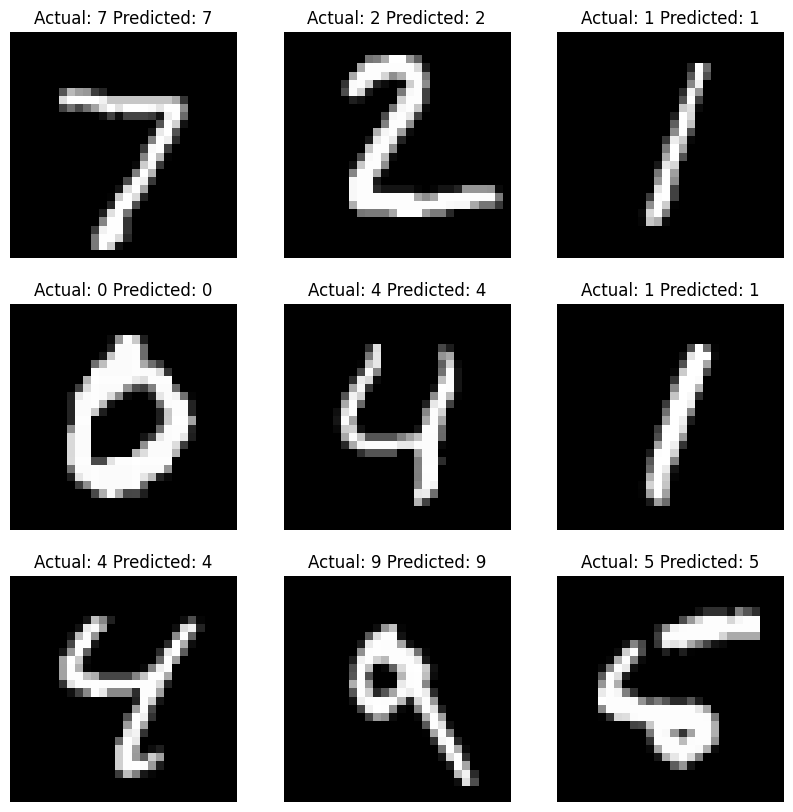

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Test画像のうちのいくつかを選択
dataiter = iter(test_loader)
images, labels = next(dataiter)

# モデルで推論
model.eval()
with torch.no_grad():
    model, images = model.to(device), images.to(device)
    outputs = model(images)

# 最も可能性の高い予測を取得
_, predicted = torch.max(outputs, 1)

print(f'labels: {labels}')
print(f'predicted: {predicted}')


# 結果の表示
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i][0].cpu().numpy().copy(), cmap='gray')
    plt.title(f'Actual: {labels[i]} Predicted: {predicted[i]}')
    plt.axis('off')
plt.show()
